In [1]:
%config InlineBackend.figure_format = 'retina'
%pylab inline
from nsaba.nsaba import nsaba
import matplotlib.pyplot as plt
import matplotlib.patches
from foof import syn
from foof.fit import FOOF
import numpy as np
import os
import scipy.io
import scipy.signal
import pandas as pd
import bisect
from foof import syn
import scipy.stats
import sklearn.mixture
import itertools

Populating the interactive namespace from numpy and matplotlib


In [2]:
p = '/Users/Torben/Documents/nsaba_foof/Subject1_PSD_Vertex_0-500Hz.mat'
dat = scipy.io.loadmat(p)
freqs = np.squeeze(dat['Freqs'])
psds = np.squeeze(dat['TF'])
rownames = np.squeeze(dat['RowNames'])
print dat.keys()

p2 = '/Users/Torben/Documents/nsaba_foof/Scout_Vertex_Details.mat'
scout_to_vert = scipy.io.loadmat(p2)
center_inds = scout_to_vert['scout_cent']
#print len(center_inds)
print scout_to_vert.keys()
#print scout_to_vert['Vertex']

['Freqs', '__header__', '__globals__', 'RowNames', 'TF', '__version__']
['Vertex_co', '__header__', 'Vertices', 'Label', 'scout_cent', '__version__', '__globals__']


(15002, 3)
Look at the brain!
y values are saved in scout_to_vert['Vertex_co'][:,0]! max=0.104709459169


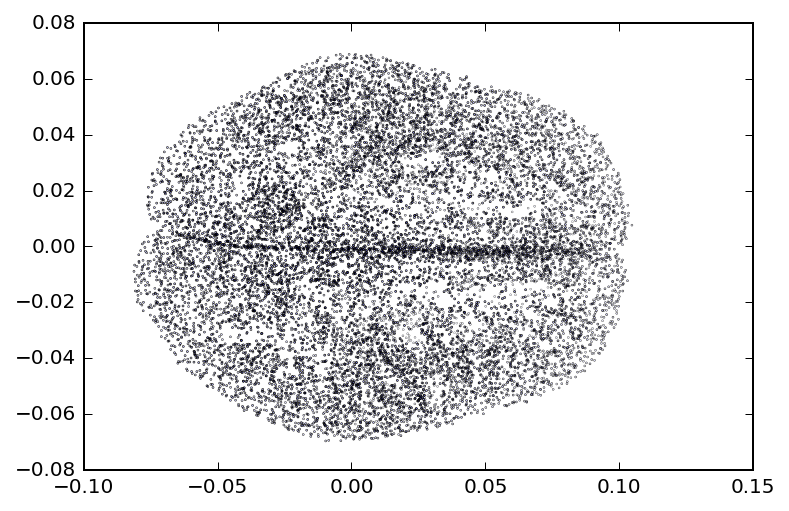

In [157]:
print scout_to_vert['Vertex_co'].shape
print 'Look at the brain!'
print "y values are saved in scout_to_vert['Vertex_co'][:,0]! max=" + str(max(scout_to_vert['Vertex_co'][:,0]))
plt.scatter(scout_to_vert['Vertex_co'][:,0],scout_to_vert['Vertex_co'][:,1],scout_to_vert['Vertex_co'][:,2])

In [3]:
"""
y_inds = scout_to_vert['Vertex_co'][:,1]
all_cfs = [];
all_bws = [];
all_chi = [];

deltas = [];
thetas = [];
alphas = [];
betas = [];
gammas = [];
hi_gammas = [];
ind_matrix = np.zeros((10,len(psds)*3))
ind=0
vertex_match = 0;

for x in xrange(len(psds)):
    foof = FOOF(min_p=0.1,res = freqs[1]-freqs[0])
    temp_psd= np.expand_dims(psds[x,bisect.bisect(freqs,3):bisect.bisect(freqs,30)-1].T,axis=1)
    foof.model(freqs[bisect.bisect(freqs,3):bisect.bisect(freqs,30)-1],temp_psd)
    all_cfs.extend(foof.centers_)
    all_bws.extend(foof.stdevs_)
    all_chi.append(foof.chi_)
    for cf in xrange(len(foof.centers_)):
        ind_matrix[0,ind]=foof.centers_[cf]
        ind_matrix[1,ind]=foof.stdevs_[cf]
        ind_matrix[2,ind]=foof.chi_

        if foof.centers_[cf] > 0 and foof.centers_[cf]<5:
            deltas.append(x)
            ind_matrix[3,ind]=1

        if foof.centers_[cf] > 5 and foof.centers_[cf]<8:
            thetas.append(x)
            ind_matrix[4,ind]=1

        if foof.centers_[cf] > 8 and foof.centers_[cf]<12:
            alphas.append(x)
            ind_matrix[5,ind]=1
            
        if foof.centers_[cf] > 12 and foof.centers_[cf]<20:
            betas.append(x)
            ind_matrix[6,ind]=1

        if foof.centers_[cf] > 20 and foof.centers_[cf]<30:
            gammas.append(x)
            ind_matrix[7,ind]=1

        if foof.centers_[cf] > 30:
            hi_gammas.append(x)
            ind_matrix[8,ind]=1
        
        ind_matrix[9,ind] = vertex_match
        ind+=1
    vertex_match +=1
"""

//anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


Vertex FOOFs


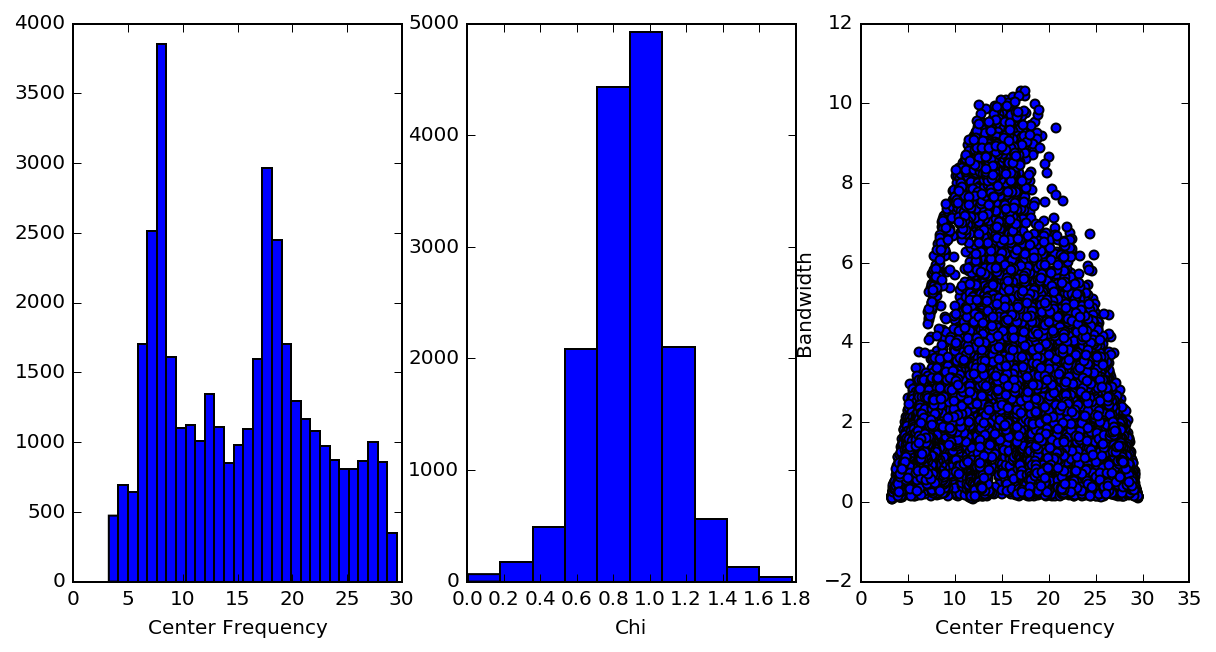

In [4]:
#ind_matrix2 = ind_matrix[:,:len(all_cfs)]
print 'Vertex FOOFs'
plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,3,1)
ax1.hist(all_cfs,30)
ax1.set_xlabel('Center Frequency')

ax2 = plt.subplot(1,3,2)
ax2.hist(all_chi)
ax2.set_xlabel('Chi')

ax3 = plt.subplot(1,3,3)
ax3.scatter(all_cfs,all_bws)
ax3.set_xlabel('Center Frequency')
ax3.set_ylabel('Bandwidth')

In [5]:
np.save('/Users/Torben/Code/vertex_data_sandbox_full.npy',ind_matrix)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


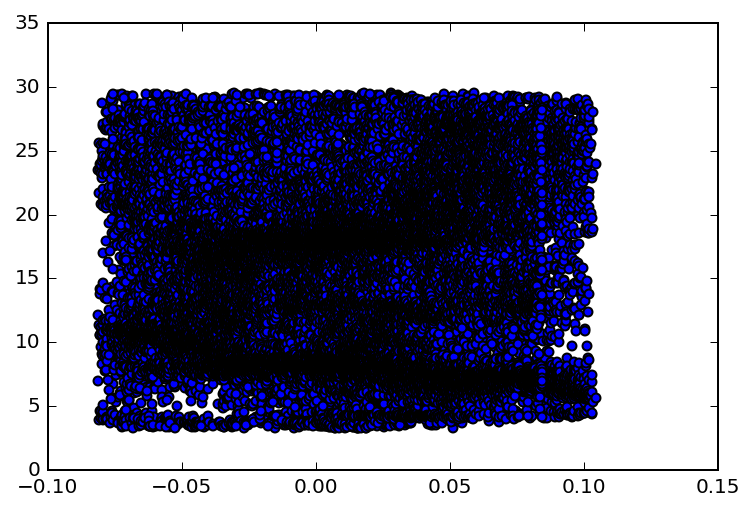

In [146]:
inds = ind_matrix[9,:]
y_inds = [scout_to_vert['Vertex_co'][ind,0] for ind in inds]
plt.scatter(y_inds,ind_matrix[0,:])

In [147]:
all_cfs_of_interest = np.zeros((2,30000))
y_inds = [scout_to_vert['Vertex_co'][ind,1] for ind in inds]
i=0
for cf in xrange(ind_matrix.shape[1]):
    if ind_matrix[0,cf] > 5 and ind_matrix[0,cf] < 14:
        all_cfs_of_interest[0,i] = ind_matrix[0,cf]
        all_cfs_of_interest[1,i] = y_inds[cf]
        i+=1
        
all_cfs_of_interest = all_cfs_of_interest[:,:i]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


(-0.12568760546797583, 7.4379377738391905e-57)


(array([  683.,  1669.,  2570.,  3837.,  1477.,  1086.,  1135.,  1005.,
         1485.,   912.]),
 array([  5.00876927,   5.90780238,   6.8068355 ,   7.70586862,
          8.60490174,   9.50393486,  10.40296798,  11.3020011 ,
         12.20103422,  13.10006734,  13.99910045]),
 <a list of 10 Patch objects>)

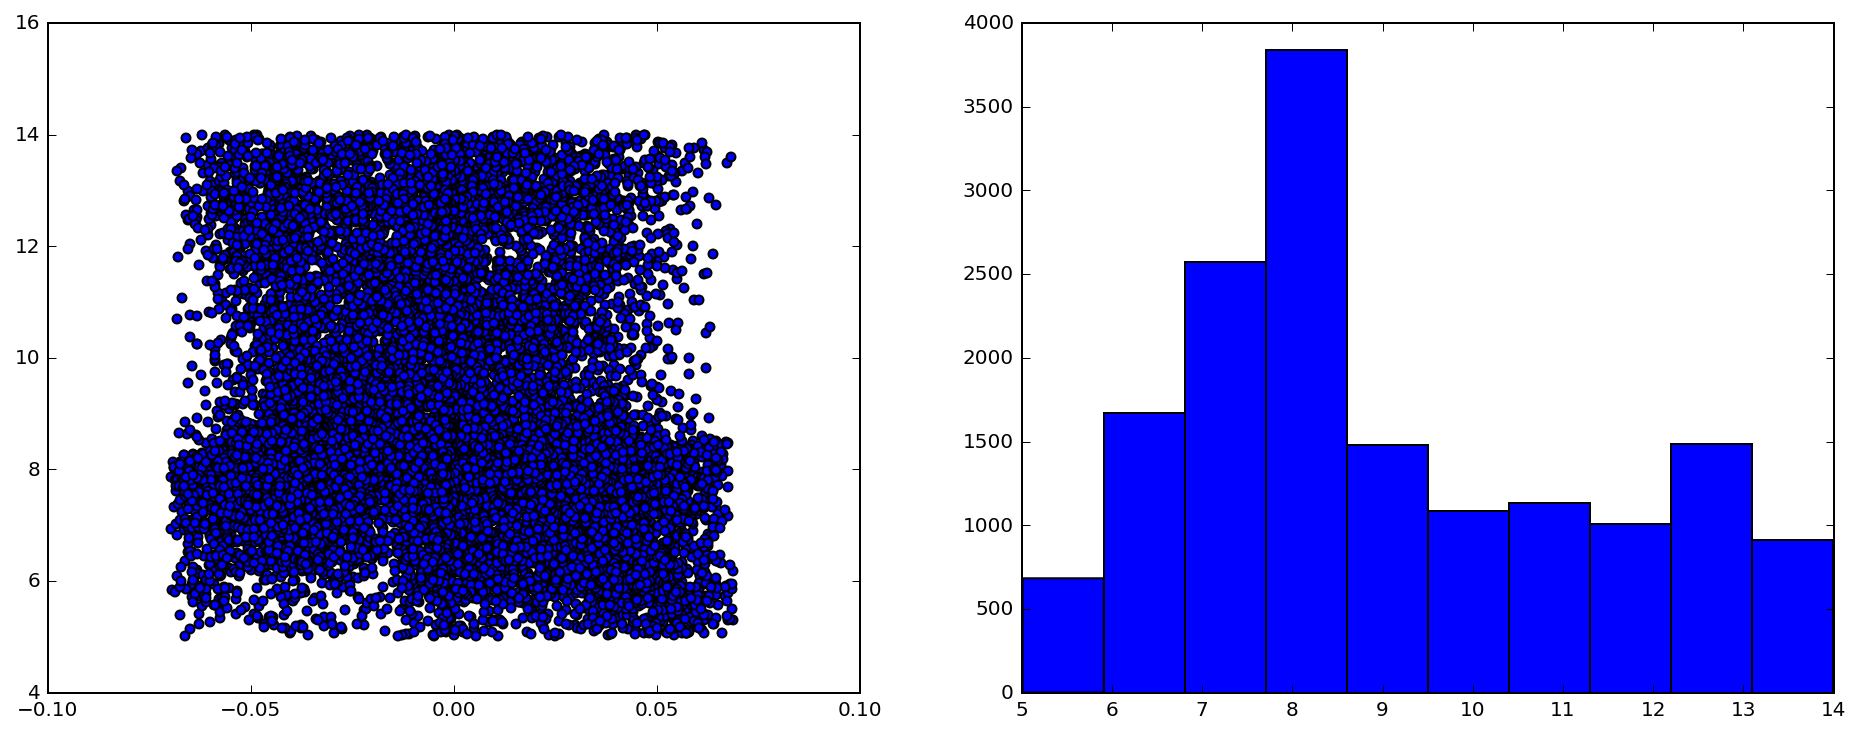

In [148]:
plt.figure(figsize=(16,6))
ax1 = plt.subplot(1,2,1)
ax1.scatter(all_cfs_of_interest[1],all_cfs_of_interest[0])
print scipy.stats.pearsonr(all_cfs_of_interest[1],all_cfs_of_interest[0])

ax2 = plt.subplot(1,2,2)
ax2.hist(all_cfs_of_interest[0])

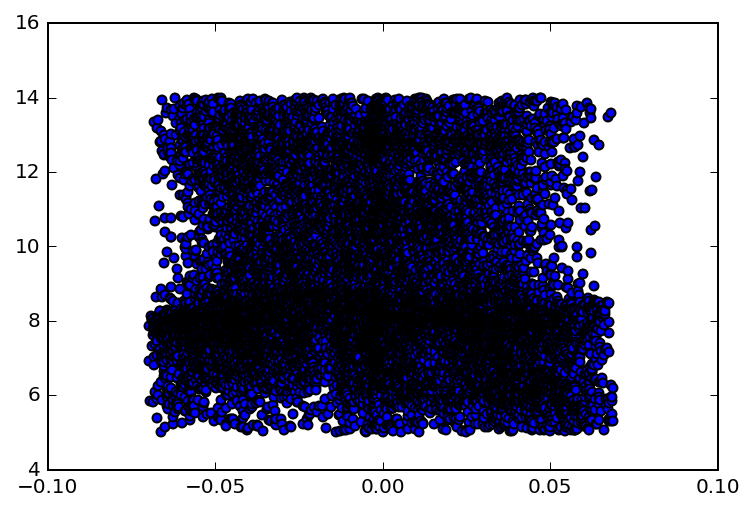

In [149]:
# prep data for median filtering
sorted_y_inds = [i[0] for i in sorted(enumerate(all_cfs_of_interest[1,:]), key=lambda x:x[1])]
sorted_y = [i[1] for i in sorted(enumerate(all_cfs_of_interest[1,:]), key=lambda x:x[1])]
ordered_cfs = [all_cfs_of_interest[0,i] for i in sorted_y_inds]

# median filter
small_median_filtered = scipy.signal.medfilt(ordered_cfs,51)
medium_median_filtered = scipy.signal.medfilt(ordered_cfs,501)
large_median_filtered = scipy.signal.medfilt(ordered_cfs,2001)

# sanity check
plt.scatter(sorted_y,ordered_cfs)

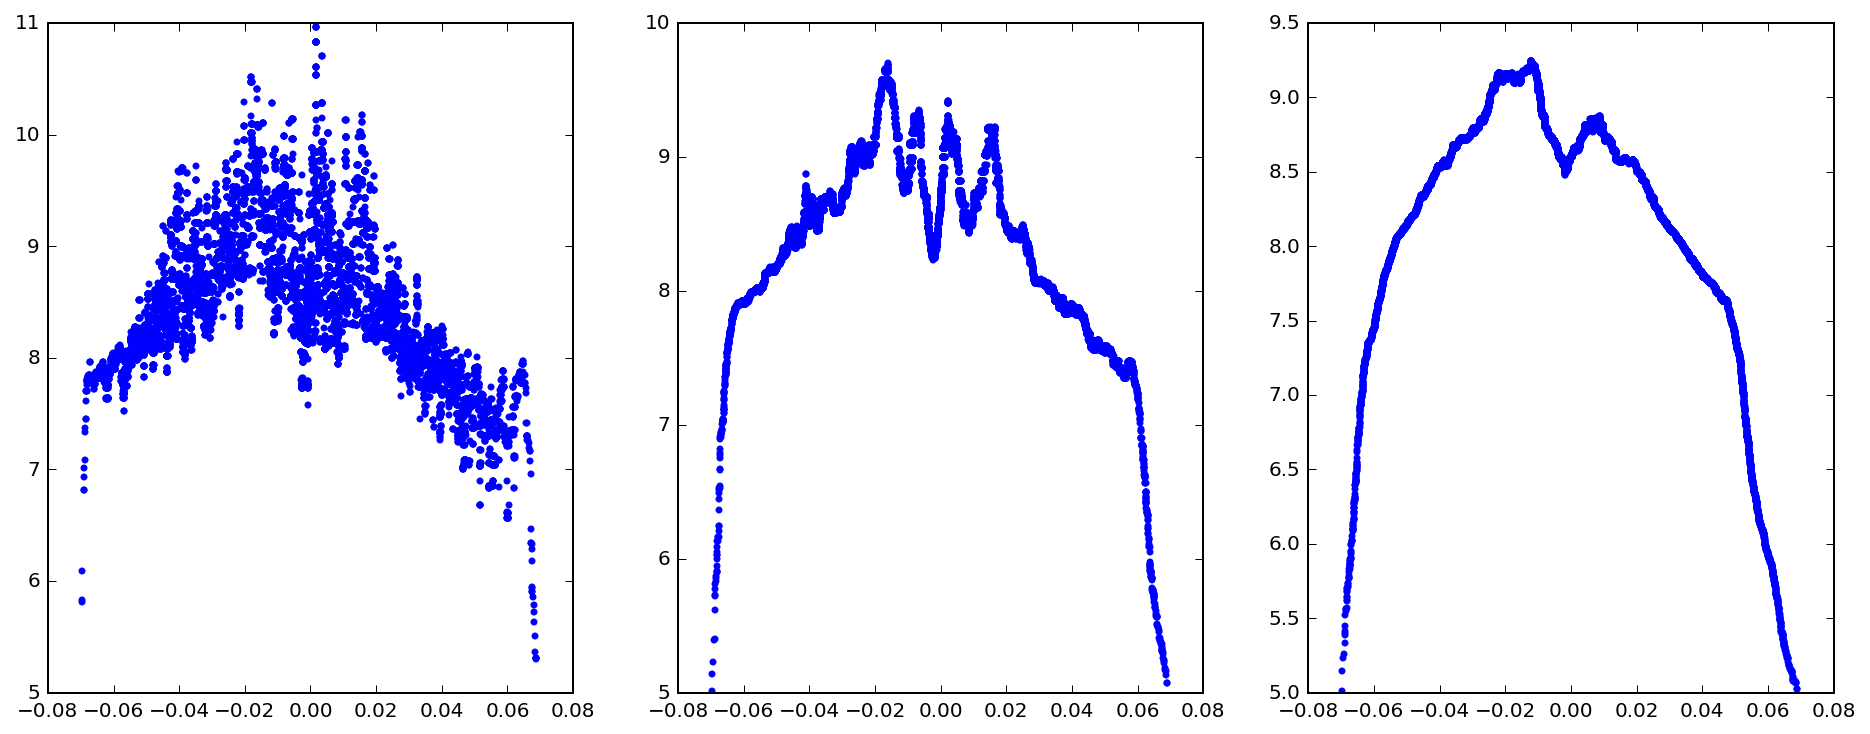

In [150]:
# plot median filtered data
plt.figure(figsize=(16,6))
ax1 = plt.subplot(1,3,1)
ax1.plot(sorted_y,small_median_filtered,'.')
ax2 = plt.subplot(1,3,2)
ax2.plot(sorted_y,medium_median_filtered,'.')
ax3 = plt.subplot(1,3,3)
ax3.plot(sorted_y,large_median_filtered,'.')


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:27: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:34: DeprecationWarning: using a non-integer nu

(-0.1, 0.1)

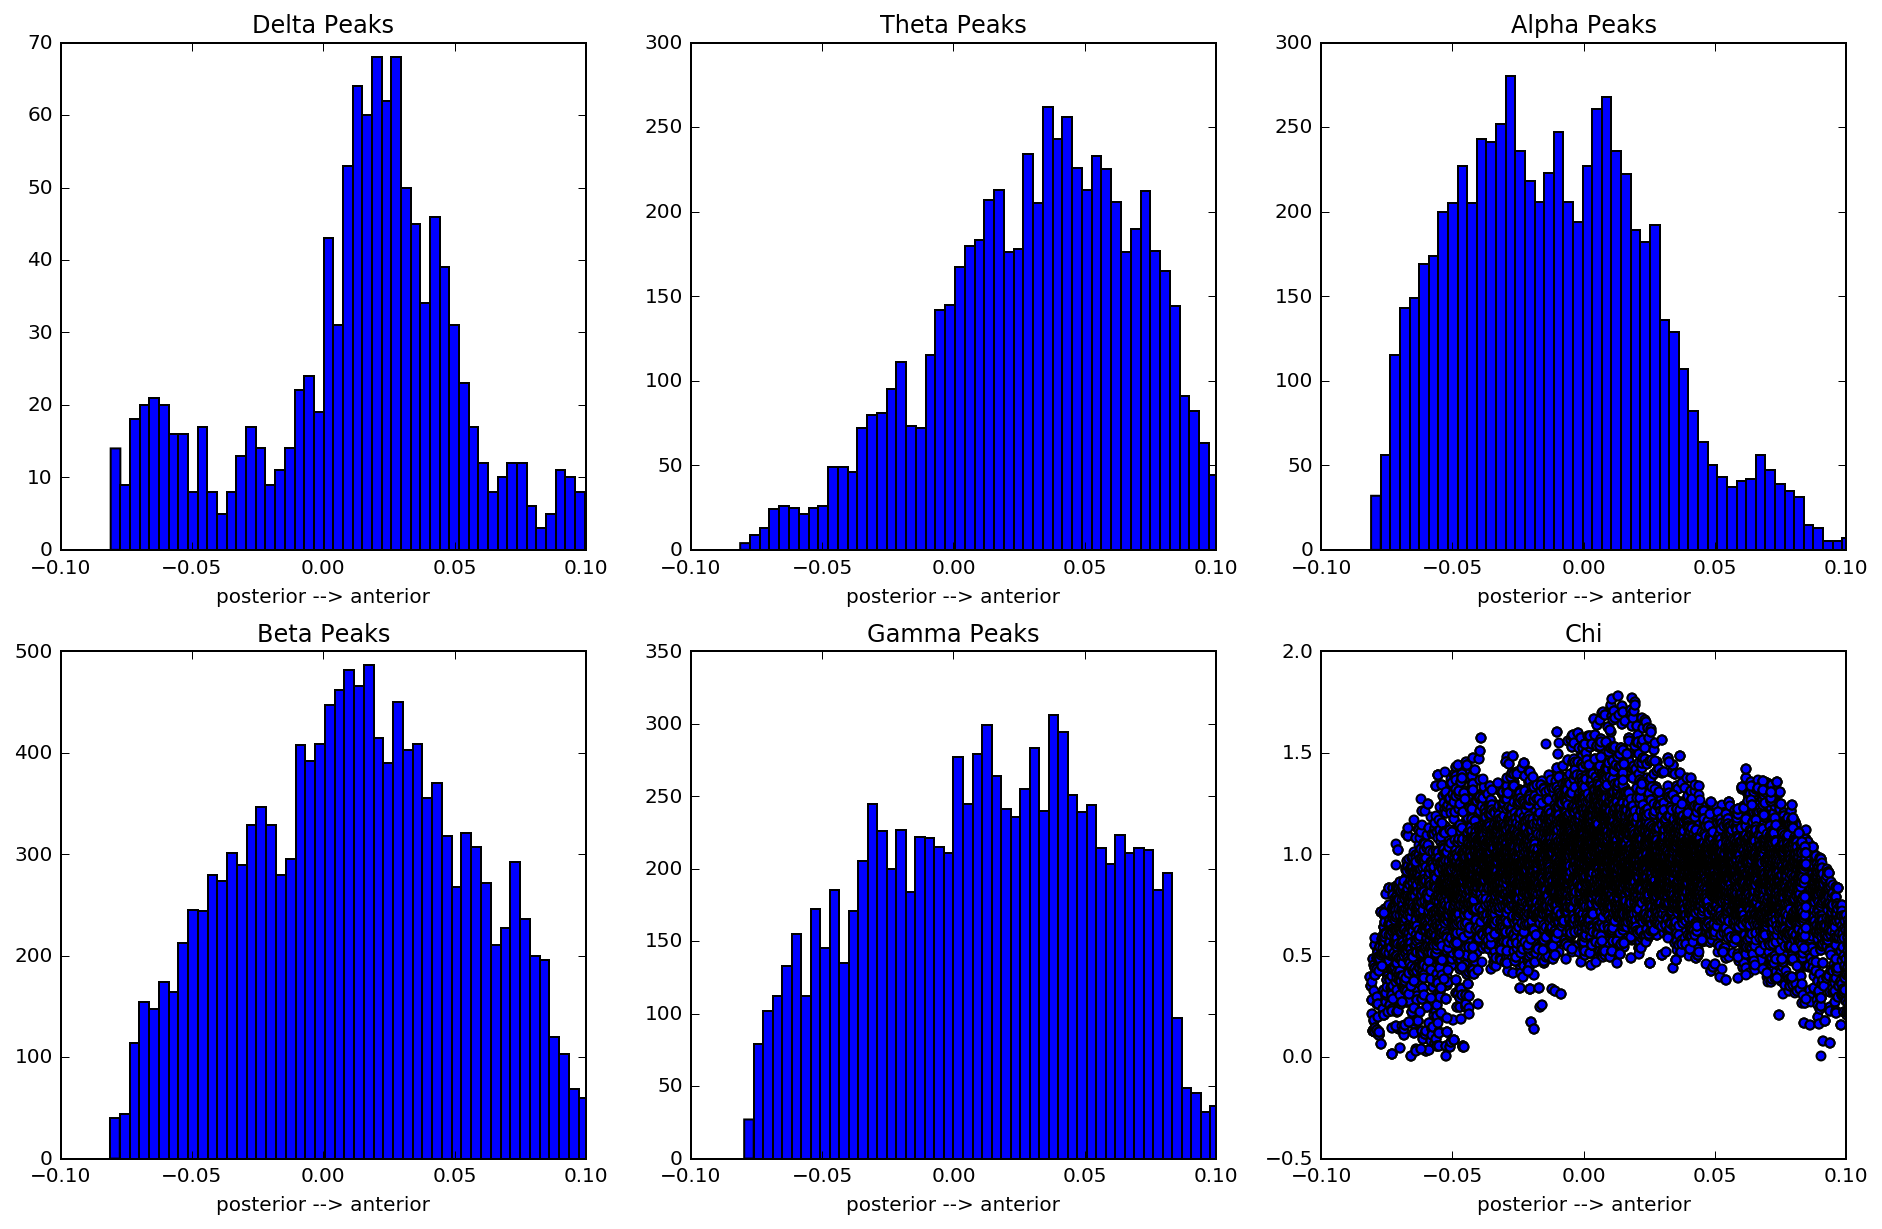

In [158]:
inds = ind_matrix[9,:]
y_vals = [scout_to_vert['Vertex_co'][ind,0] for ind in inds]

plt.figure(figsize=(16,10))
ax1 = plt.subplot(2,3,1)
y_where_delta = [scout_to_vert['Vertex_co'][inds[ind],0] for ind in xrange(ind_matrix.shape[1]) if ind_matrix[3,ind] == 1]
ax1.hist(y_where_delta,50)
ax1.set_xlabel('posterior --> anterior')
ax1.set_title('Delta Peaks')
ax1.set_xlim([-.1,.1])

ax2 = plt.subplot(2,3,2)
y_where_theta = [scout_to_vert['Vertex_co'][inds[ind],0] for ind in xrange(ind_matrix.shape[1]) if ind_matrix[4,ind] == 1]
ax2.hist(y_where_theta,50)
ax2.set_xlabel('posterior --> anterior')
ax2.set_title('Theta Peaks')
ax2.set_xlim([-.1,.1])

ax3 = plt.subplot(2,3,3)
y_where_alpha = [scout_to_vert['Vertex_co'][inds[ind],0] for ind in xrange(ind_matrix.shape[1]) if ind_matrix[5,ind] == 1]
ax3.hist(y_where_alpha,50)
ax3.set_xlabel('posterior --> anterior')
ax3.set_title('Alpha Peaks')
ax3.set_xlim([-.1,.1])

ax4 = plt.subplot(2,3,4)
y_where_beta = [scout_to_vert['Vertex_co'][ind,0] for ind in inds if ind_matrix[6,ind] == 1]
ax4.hist(y_where_beta,50)
ax4.set_xlabel('posterior --> anterior')
ax4.set_title('Beta Peaks')
ax4.set_xlim([-.1,.1])

ax5 = plt.subplot(2,3,5)
y_where_gamma = [scout_to_vert['Vertex_co'][ind,0] for ind in inds if ind_matrix[7,ind] == 1]
ax5.hist(y_where_gamma,50)
ax5.set_xlabel('posterior --> anterior')
ax5.set_title('Gamma Peaks')
ax5.set_xlim([-.1,.1])

ax6 = plt.subplot(2,3,6)
ax6.scatter(y_vals,ind_matrix[2,:])
ax6.set_xlabel('posterior --> anterior')
ax6.set_title('Chi')
ax6.set_xlim([-.1,.1])

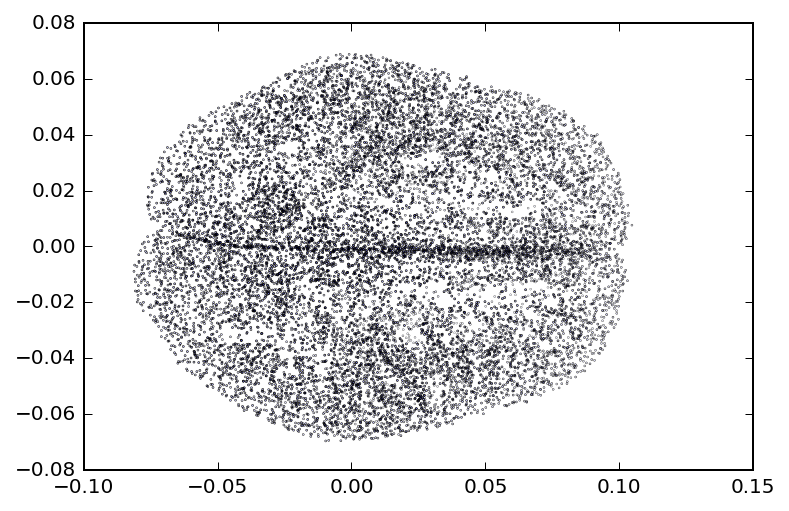

In [144]:
max(scout_to_vert['Vertex_co'][:,0])

0.10470945916938362